In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.make_holidays import make_holidays_df

In [82]:
df = pd.read_csv('store_sales.csv')
# dataset https://www.kaggle.com/datasets/abhishekjaiswal4896/store-sales-dataset

In [52]:
df['date'] = pd.to_datetime(df['date'])

In [53]:
df[df.isna().any(axis=1)]
df = df.dropna()
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

In [54]:
df = df[['ds', 'y']]
df

,ds,y
0,2022-01-01,184.78
1,2022-01-02,192.62
2,2022-01-03,212.68
3,2022-01-04,249.58
4,2022-01-05,223.50
...,...,...
7295,2023-12-27,242.08
7296,2023-12-28,235.35
7297,2023-12-29,222.82
7298,2023-12-30,236.04


In [61]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(df)

12:27:21 - cmdstanpy - INFO - Chain [1] start processing
12:27:21 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

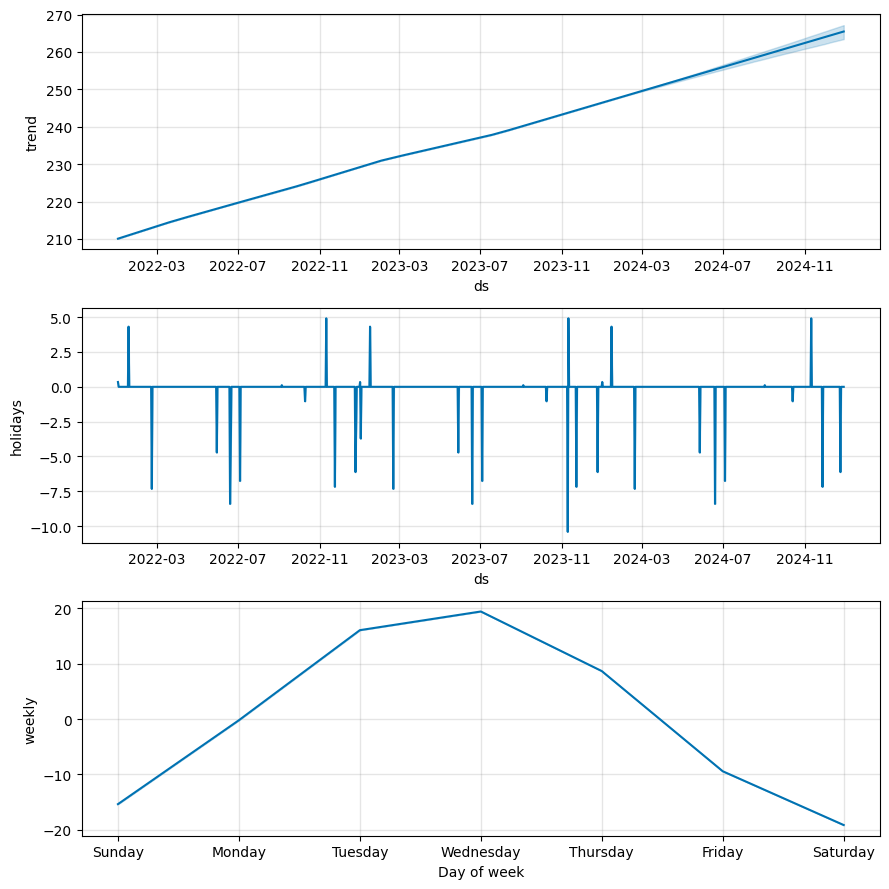

In [79]:
m.plot_components(forecast)
plt.show()

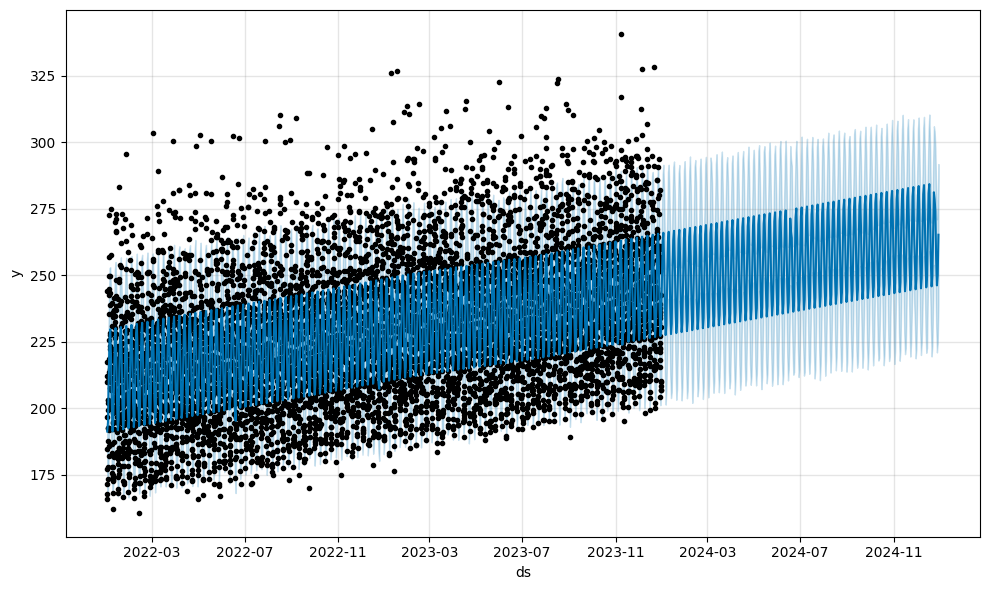

In [81]:
m.plot(forecast)
plt.show()